# Sheet06 Solution

Group members - 
1. Aayush Manoj Tirmalle (Matrikel nummer - 4730148)
2. Joshua Ulrich Mulihigoa Mauligalo (Matrikel nummer - 4269797)

### 1.  Forward- and reverse-mode differentiation

#### Part (a)

To build the most efficient graph, we break the equation down into primitive steps (operations like $+, \exp, \cdot^2, \sin$). We assign intermediate variables $v_i$ to the results of these steps.

*Variables:*
*   *$v_0 = x$* (The input)
*   *$v_1 = \exp(v_0)$* (Calculate inner exponential)
*   *$v_2 = v_1^2$* (Square the previous result)
*   *$v_3 = v_1 + v_2$*(Calculate the sum inside the brackets)
*   *$v_4 = \exp(v_3)$* (Calculate the outer exponential part)
*   *$v_5 = \sin(v_3)$* (Calculate the outer sine part)
*   *$v_6 = v_4 + v_5$* (Sum them for the final output $y$)

*The Computational Graph Structure:*

```text
      v0 (x)
       |
       v
      v1 = exp(v0)
      /      \
     /        \
    v          v
(direct)    v2 = v1^2
    \        /
     \      /
      v    v
      v3 = v1 + v2
      /      \
     /        \
    v          v
v4 = exp(v3)  v5 = sin(v3)
    \          /
     \        /
      v      v
       v6 = y
```

#### Part (b)

1.  *Input:*
    $$v_0 = x$$
    $$\dot{v}_0 = \frac{\partial x}{\partial x} = 1$$

2.  *Node $v_1$:*
    $$v_1 = \exp(v_0)$$
    Using chain rule: $\dot{v}_1 = \exp(v_0) \cdot \dot{v}_0$
    Substitute values: $\dot{v}_1 = \exp(x) \cdot 1 = \mathbf{\exp(x)}$

3.  *Node $v_2$:*
    $$v_2 = v_1^2$$
    Using chain rule (power rule): $\dot{v}_2 = 2v_1 \cdot \dot{v}_1$
    Substitute values: $\dot{v}_2 = 2\exp(x) \cdot \exp(x)$

4.  *Node $v_3$:*
    $$v_3 = v_1 + v_2$$
    Using linearity: $\dot{v}_3 = \dot{v}_1 + \dot{v}_2$
    Substitute values: $\dot{v}_3 = \exp(x) + 2\exp(x)^2$

5.  *Node $v_4$:*
    $$v_4 = \exp(v_3)$$
    Using chain rule: $\dot{v}_4 = \exp(v_3) \cdot \dot{v}_3$
    *(Note: $v_4$ is actually just $\exp(v_3)$)*
    Result: $\dot{v}_4 = v_4 \cdot \dot{v}_3$

6.  *Node $v_5$:*
    $$v_5 = \sin(v_3)$$
    Using chain rule: $\dot{v}_5 = \cos(v_3) \cdot \dot{v}_3$

7.  *Node $v_6$ (Output $y$):*
    $$v_6 = v_4 + v_5$$
    Using linearity: $\dot{v}_6 = \dot{v}_4 + \dot{v}_5$

    Now, substitute the results from steps 5 and 6:
    $$\dot{v}_6 = (v_4 \cdot \dot{v}_3) + (\cos(v_3) \cdot \dot{v}_3)$$
    Factor out $\dot{v}_3$:
    $$\frac{\partial y}{\partial x} = \dot{v}_3 \cdot (v_4 + \cos(v_3))$$

    *Final Answer:*
    $$\frac{\partial y}{\partial x} = (\exp(x) + 2\exp(x)^2) \cdot (\exp(v_3) + \cos(v_3))$$



#### Part (c)

1.  *Output Node ($y$):*
    Start at $v_6$.
    $$\bar{v}_6 = \frac{\partial y}{\partial y} = 1$$

2.  *Node $v_6 = v_4 + v_5$:*
    Since this is a sum, the gradient distributes equally (derivative of sum is 1).
    $$\bar{v}_4 = \bar{v}_6 \cdot \frac{\partial v_6}{\partial v_4} = 1 \cdot 1 = 1$$
    $$\bar{v}_5 = \bar{v}_6 \cdot \frac{\partial v_6}{\partial v_5} = 1 \cdot 1 = 1$$

3.  *Node $v_5 = \sin(v_3)$:*
    Compute contribution to $v_3$.
    $$\text{contribution from } v_5 = \bar{v}_5 \cdot \frac{\partial v_5}{\partial v_3} = 1 \cdot \cos(v_3)$$

4.  *Node $v_4 = \exp(v_3)$:*
    Compute contribution to $v_3$.
    $$\text{contribution from } v_4 = \bar{v}_4 \cdot \frac{\partial v_4}{\partial v_3} = 1 \cdot \exp(v_3) = v_4$$

5.  *Accumulate Gradient for $v_3$:*
    Since $v_3$ branches into $v_4$ and $v_5$, we sum their contributions:
    $$\bar{v}_3 = (\text{from } v_5) + (\text{from } v_4)$$
    $$\bar{v}_3 = \cos(v_3) + v_4$$

6.  *Node $v_3 = v_1 + v_2$:*
    Distribute $\bar{v}_3$ to its parents.
    $$\bar{v}_2 = \bar{v}_3 \cdot \frac{\partial v_3}{\partial v_2} = \bar{v}_3 \cdot 1 = \bar{v}_3$$
    $$\text{contribution to } v_1 \text{ (direct)} = \bar{v}_3 \cdot \frac{\partial v_3}{\partial v_1} = \bar{v}_3 \cdot 1 = \bar{v}_3$$

7.  *Node $v_2 = v_1^2$:*
    Compute contribution to $v_1$.
    $$\text{contribution to } v_1 \text{ (from square)} = \bar{v}_2 \cdot \frac{\partial v_2}{\partial v_1} = \bar{v}_2 \cdot 2v_1$$

8.  *Accumulate Gradient for $v_1$:*
    $v_1$ was used in $v_3$ directly, and also in $v_2$. We sum the contributions:
    $$\bar{v}_1 = (\text{direct from } v_3) + (\text{from } v_2)$$
    $$\bar{v}_1 = \bar{v}_3 + (\bar{v}_2 \cdot 2v_1)$$
    Since $\bar{v}_2 = \bar{v}_3$, we can simplify:
    $$\bar{v}_1 = \bar{v}_3 + \bar{v}_3 \cdot 2v_1 = \bar{v}_3 \cdot (1 + 2v_1)$$

9.  *Node $v_1 = \exp(v_0)$ (Final Step to $x$):*
    $$\bar{v}_0 = \bar{v}_1 \cdot \frac{\partial v_1}{\partial v_0} = \bar{v}_1 \cdot \exp(v_0) = \bar{v}_1 \cdot v_1$$

    *Substitute back to verify:*
    Since $\bar{v}_3 = \cos(v_3) + v_4$:
    $$\bar{v}_1 = (\cos(v_3) + v_4) \cdot (1 + 2v_1)$$
    $$\bar{v}_0 = [(\cos(v_3) + v_4) \cdot (1 + 2v_1)] \cdot v_1$$

    This matches the result from Forward-Mode (rearranged):
    $v_1(1+2v_1) \rightarrow (v_1 + 2v_1^2) \rightarrow (\exp(x) + 2\exp(x)^2)$.
    $(\cos(v_3) + v_4) \rightarrow (\cos(v_3) + \exp(v_3))$.

    *Final Answer:*
    $$\frac{\partial y}{\partial x} = \bar{v}_0 = v_1 \cdot (1 + 2v_1) \cdot (v_4 + \cos(v_3))$$

### 2.  ADAM optimizer

#### Part (a)

The Adam optimizer combines ideas from Momentum (keeping a moving average of gradients) and RMSProp (keeping a moving average of squared gradients to scale learning rates).

Here are the formulae for time step $t$, with parameters $\theta$, gradient $g_t$, learning rate $\alpha$, and decay rates $\beta_1, \beta_2$:

1.  **$g_t = \nabla_\theta f_t(\theta_{t-1})$**
    *   *Description:* Compute the gradient of the loss function with respect to the parameters.
2.  **$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$**
    *   *Description:* Update the first moment estimate (the moving average of the gradients). This adds momentum.
3.  **$v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$**
    *   *Description:* Update the second raw moment estimate (the moving average of the squared gradients). This tracks the variance/magnitude of the gradients.
4.  **$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$**
    *   *Description:* Compute the bias-corrected first moment to account for the initialization of $m_0=0$ (prevents estimates from being biased toward zero early on).
5.  **$\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$**
    *   *Description:* Compute the bias-corrected second moment to account for the initialization of $v_0=0$.
6.  **$\theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$**
    *   *Description:* Update the parameters. The step size is adapted by dividing the momentum ($\hat{m}_t$) by the root mean square of the gradients ($\sqrt{\hat{v}_t}$), effectively normalizing the update for each parameter.

#### Part (b)

We need to show that at $t=1$, the update step is proportional to the sign of the gradient ($g_1$).

*Assumptions:*
*   Initialize moments to zero: $m_0 = 0$, $v_0 = 0$.
*   Assume the smoothing term $\epsilon \approx 0$ (negligible for this derivation).

*Step 1: Calculate $m_1$ and $v_1$*
$$m_1 = \beta_1(0) + (1-\beta_1)g_1 = (1-\beta_1)g_1$$
$$v_1 = \beta_2(0) + (1-\beta_2)g_1^2 = (1-\beta_2)g_1^2$$

*Step 2: Apply Bias Correction*
At $t=1$, the correction terms are $(1-\beta_1^1)$ and $(1-\beta_2^1)$.
$$\hat{m}_1 = \frac{m_1}{1 - \beta_1} = \frac{(1-\beta_1)g_1}{1 - \beta_1} = g_1$$
$$\hat{v}_1 = \frac{v_1}{1 - \beta_2} = \frac{(1-\beta_2)g_1^2}{1 - \beta_2} = g_1^2$$

*Step 3: Calculate the Parameter Update*
Substitute $\hat{m}_1$ and $\hat{v}_1$ into the update rule (ignoring $\epsilon$):
$$\Delta \theta = - \alpha \frac{\hat{m}_1}{\sqrt{\hat{v}_1}}$$
$$\Delta \theta = - \alpha \frac{g_1}{\sqrt{g_1^2}}$$

Since $\sqrt{x^2} = |x|$ (absolute value), we get:
$$\Delta \theta = - \alpha \frac{g_1}{|g_1|}$$

Since $\frac{x}{|x|}$ is the definition of the sign function ($\text{sign}(x)$):
$$\Delta \theta = - \alpha \cdot \text{sign}(g_1)$$

#### Part (c)

The standard way to mitigate this in practice is to use a *Learning Rate Warmup*.
*   Instead of starting with the full learning rate $\alpha$, we start with a very small learning rate close to 0.
*   We linearly increase the learning rate over the first few thousand iterations (or epochs).
*   This prevents the "sign descent" behavior at the start from causing large, unstable updates to the weights before the moment estimates ($m_t, v_t$) have stabilized.

#### Part (d)

1.  **L2 Regularization in Loss:**
    If you add the penalty term $\frac{\lambda}{2}\|w\|^2$ to the loss function, the gradient of this term is $\lambda w$. This gradient is added to $g_t$.
    In Adam, this gradient $\lambda w$ ends up being placed inside the moving averages and eventually divided by $\sqrt{\hat{v}_t}$.
    *   *Result:* The regularization strength is **scaled by the inverse of the gradient magnitudes**. Weights with large historical gradients will be regularized *less* than weights with small gradients. This is usually not the intended behavior of L2 regularization.

2.  **Weight Decay applied directly (AdamW):**
    If you apply weight decay directly to the weights, the update looks like:
    $$w_{t+1} = w_t - \alpha (\dots \text{Adam update} \dots) - \alpha \lambda w_t$$
    *   *Result:* The regularization is subtracted separately from the adaptive update. The decay rate is consistent across all parameters, regardless of their gradient history.

*Direct Weight Decay (AdamW) is better.* It decouples the regularization from the adaptive learning rate mechanism. This allows the optimizer to adapt the step size for the loss minimization task, while maintaining a consistent, intended rate of weight decay to prevent overfitting. L2-in-loss entangles these two goals, leading to suboptimal generalization.

### 3. Heteroscedastic regression

#### Part (a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check for device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Load the dataset
file_path = 'data/x_y.csv' 
df = pd.read_csv(file_path)

# Extract x and y
x_data = df['x'].values.astype(np.float32).reshape(-1, 1)
y_data = df['y'].values.astype(np.float32).reshape(-1, 1)

# Convert to PyTorch tensors
x_tensor = torch.from_numpy(x_data)
y_tensor = torch.from_numpy(y_data)

# Create a TensorDataset
dataset = TensorDataset(x_tensor, y_tensor)

# Calculate split sizes
total_count = len(dataset)
train_count = int(0.66 * total_count)
test_count = total_count - train_count

# Random split
train_dataset, test_dataset = random_split(dataset, [train_count, test_count])

# Create DataLoaders for easier batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

print(f"Total data points: {total_count}")
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Total data points: 1000
Training set size: 660
Test set size: 340


#### Part (b)

The probability density function (PDF) for a Gaussian distribution is:
$$p(y|x, \theta) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y - f_\mu(x))^2}{2\sigma^2} \right)$$

To find the log-likelihood, we take the natural logarithm of the PDF:
$$\ln p(y|x, \theta) = \ln\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \frac{(y - f_\mu(x))^2}{2\sigma^2}$$

Since we assume homoscedastic regression, $\sigma$ is a constant and does not depend on $x$ or the model parameters $\theta$. Therefore, the term $\ln\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)$ is constant.

Maximizing the log-likelihood is equivalent to minimizing the negative log-likelihood:
$$\text{minimize } \left( \frac{(y - f_\mu(x))^2}{2\sigma^2} \right)$$

Since $2\sigma^2$ is a positive constant factor, minimizing this term is mathematically equivalent to minimizing the numerator:
$$\text{minimize } (y - f_\mu(x))^2$$

This is exactly the *Squared Error*. Thus, minimizing MSE is equivalent to maximizing the likelihood of the data under a Gaussian assumption with constant variance.


#### Part (c)

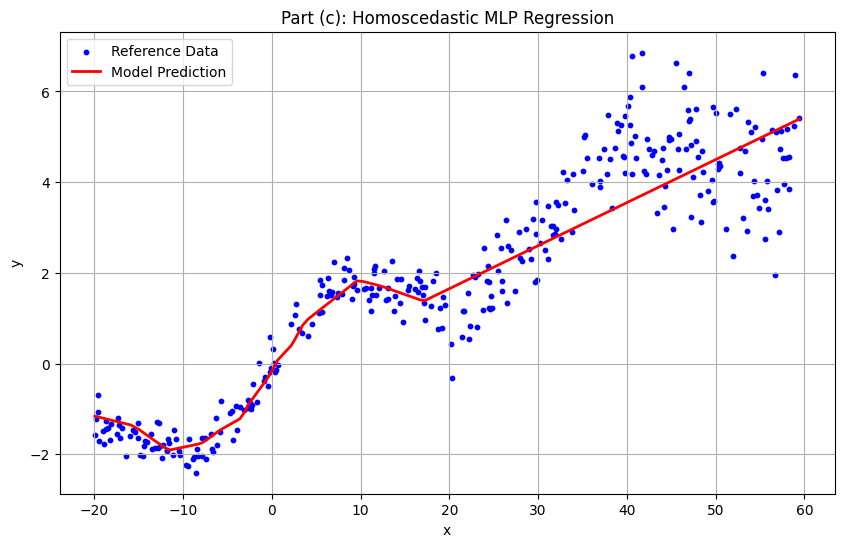

In [3]:
class HomoscedasticMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

# Initialize model
model_c = HomoscedasticMLP().to(device)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_c.parameters(), lr=0.01)

# Training Loop
epochs = 200
train_losses = []

for epoch in range(epochs):
    model_c.train()
    batch_losses = []
    for bx, by in train_loader:
        bx, by = bx.to(device), by.to(device)
        
        optimizer.zero_grad()
        prediction = model_c(bx)
        loss = criterion(prediction, by)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    
    train_losses.append(np.mean(batch_losses))

# Plotting results
model_c.eval()
with torch.no_grad():
    # Get all test data
    x_test, y_test = next(iter(test_loader))
    x_test, y_test = x_test.to(device), y_test.to(device)
    
    # Sort for cleaner plotting
    sorted_indices = torch.argsort(x_test.flatten())
    x_test_sorted = x_test[sorted_indices]
    y_test_sorted = y_test[sorted_indices]
    
    # Predict
    y_pred = model_c(x_test_sorted)

plt.figure(figsize=(10, 6))
plt.scatter(x_test_sorted.cpu(), y_test_sorted.cpu(), s=10, label='Reference Data', color='blue')
plt.plot(x_test_sorted.cpu(), y_pred.cpu(), color='red', linewidth=2, label='Model Prediction')
plt.title("Part (c): Homoscedastic MLP Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

The model is fitting the mean trend well. It is likely underfitting the complexity of the noise

#### Part (d)

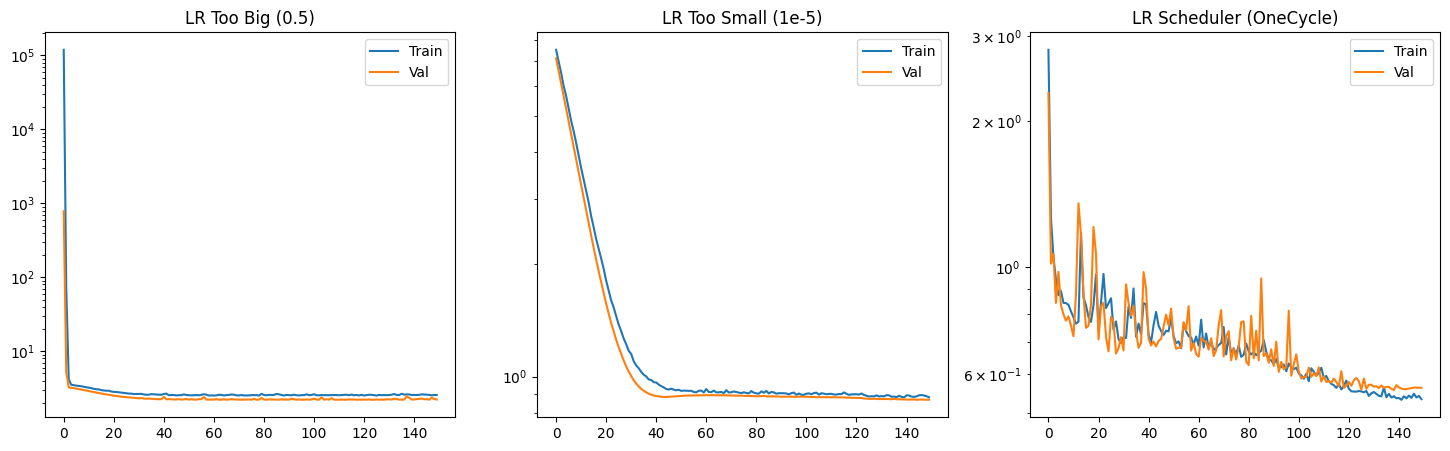

In [4]:
def train_and_evaluate(lr_val, scheduler_type=None, epochs=150):
    model = HomoscedasticMLP().to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr_val)
    criterion = nn.MSELoss()
    
    # Setup Scheduler
    scheduler = None
    if scheduler_type == 'cosine_ramp':
        # Linear warmup for first 10% epochs, then cosine annealing
        # We simulate this using OneCycleLR which does exactly: ramp up -> ramp down
        scheduler = optim.lr_scheduler.OneCycleLR(
            optimizer, max_lr=lr_val, steps_per_epoch=len(train_loader), epochs=epochs
        )
    
    train_loss_history = []
    val_loss_history = []
    
    for epoch in range(epochs):
        # Train
        model.train()
        batch_train_losses = []
        for bx, by in train_loader:
            bx, by = bx.to(device), by.to(device)
            optimizer.zero_grad()
            pred = model(bx)
            loss = criterion(pred, by)
            loss.backward()
            optimizer.step()
            if scheduler:
                scheduler.step()
            batch_train_losses.append(loss.item())
        
        train_loss_history.append(np.mean(batch_train_losses))
        
        # Validation (using test set)
        model.eval()
        with torch.no_grad():
            x_val, y_val = next(iter(test_loader))
            x_val, y_val = x_val.to(device), y_val.to(device)
            val_pred = model(x_val)
            val_loss = criterion(val_pred, y_val)
            val_loss_history.append(val_loss.item())
            
    return train_loss_history, val_loss_history

# 1. LR Too Big
train_big, val_big = train_and_evaluate(lr_val=0.5)

# 2. LR Too Small
train_small, val_small = train_and_evaluate(lr_val=0.00001)

# 3. Scheduler (Linear ramp up with cosine annealing)
# Usually OneCycleLR handles this behavior nicely.
train_sched, val_sched = train_and_evaluate(lr_val=0.01, scheduler_type='cosine_ramp')

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Big LR
axes[0].plot(train_big, label='Train')
axes[0].plot(val_big, label='Val')
axes[0].set_title("LR Too Big (0.5)")
axes[0].set_yscale('log')
axes[0].legend()

# Plot Small LR
axes[1].plot(train_small, label='Train')
axes[1].plot(val_small, label='Val')
axes[1].set_title("LR Too Small (1e-5)")
axes[1].set_yscale('log')
axes[1].legend()

# Plot Scheduler
axes[2].plot(train_sched, label='Train')
axes[2].plot(val_sched, label='Val')
axes[2].set_title("LR Scheduler (OneCycle)")
axes[2].set_yscale('log')
axes[2].legend()

plt.show()

#### Part (e)

The PDF for a single data point $(x_i, y_i)$ where the variance depends on input $x_i$ is:
$$p(y_i|x_i, \theta) = \frac{1}{\sqrt{2\pi f_{\sigma^2}(x_i)}} \exp\left( -\frac{(y_i - f_\mu(x_i))^2}{2 f_{\sigma^2}(x_i)} \right)$$

The log-likelihood for $N$ data points is the sum of the logs of individual PDFs:
$$\mathcal{L} = \sum_{i=1}^{N} \ln p(y_i|x_i, \theta)$$
$$\mathcal{L} = \sum_{i=1}^{N} \left[ \ln\left( (2\pi f_{\sigma^2}(x_i))^{-1/2} \right) - \frac{(y_i - f_\mu(x_i))^2}{2 f_{\sigma^2}(x_i)} \right]$$

Using logarithm rules $\ln(z^{-1/2}) = -\frac{1}{2}\ln(z)$:
$$\mathcal{L} = \sum_{i=1}^{N} \left[ -\frac{1}{2}\ln(2\pi) - \frac{1}{2}\ln(f_{\sigma^2}(x_i)) - \frac{(y_i - f_\mu(x_i))^2}{2 f_{\sigma^2}(x_i)} \right]$$

To get the *Loss Function* (Negative Log-Likelihood), we multiply by $-1$ and remove the constant term $\frac{1}{2}\ln(2\pi)$ as it doesn't affect optimization:

$$NLLLoss = \sum_{i=1}^{N} \left( \frac{1}{2}\ln(f_{\sigma^2}(x_i)) + \frac{(y_i - f_\mu(x_i))^2}{2 f_{\sigma^2}(x_i)} \right)$$

#### Part (f)

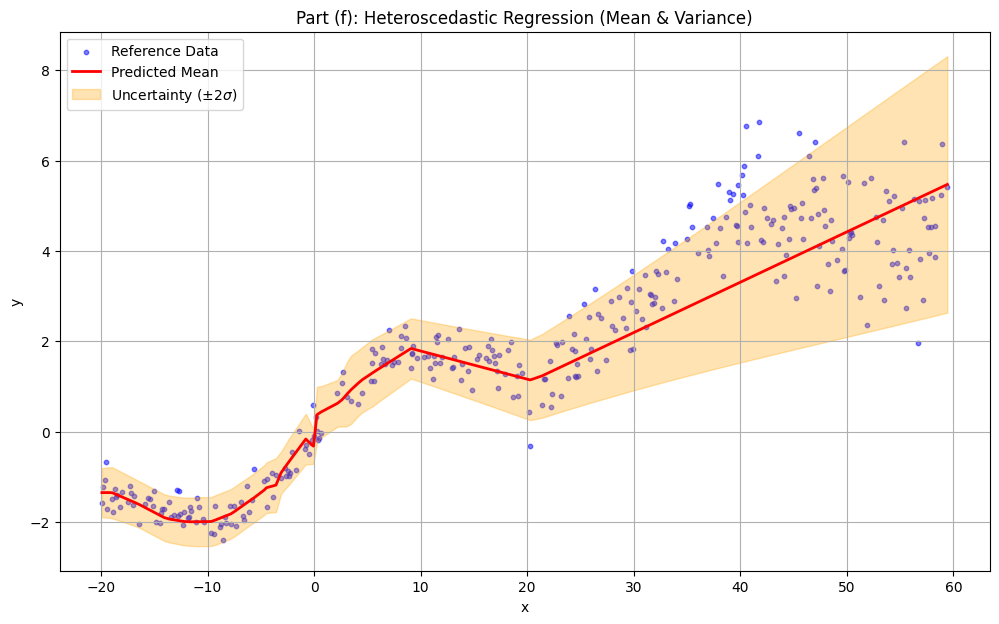

In [5]:
class HeteroscedasticMLP(nn.Module):
    def __init__(self):
        super().__init__()
        # 1 -> 32 -> 64
        self.hidden = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU()
        )
        # Output layer produces 2 values: Mean and Raw Variance
        self.output_layer = nn.Linear(64, 2)

    def forward(self, x):
        features = self.hidden(x)
        out = self.output_layer(features)
        
        mean = out[:, 0].unsqueeze(1)
        raw_var = out[:, 1].unsqueeze(1)
        
        # Use Softplus to ensure variance is positive
        # Add a small epsilon for numerical stability
        variance = torch.nn.functional.softplus(raw_var) + 1e-6
        
        return mean, variance

def heteroscedastic_loss(pred_mean, pred_var, target_y):
    # Based on derivation in (e)
    # Loss = 0.5 * log(var) + 0.5 * (y - mean)^2 / var
    loss = 0.5 * torch.log(pred_var) + 0.5 * (target_y - pred_mean)**2 / pred_var
    return loss.mean()

# Initialize
model_f = HeteroscedasticMLP().to(device)
optimizer = optim.Adam(model_f.parameters(), lr=0.01)

# Training Loop
epochs = 300  # A bit more training to let variance converge
train_losses = []

for epoch in range(epochs):
    model_f.train()
    batch_losses = []
    for bx, by in train_loader:
        bx, by = bx.to(device), by.to(device)
        
        optimizer.zero_grad()
        mean, var = model_f(bx)
        loss = heteroscedastic_loss(mean, var, by)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    
    train_losses.append(np.mean(batch_losses))

# Plotting Results
model_f.eval()
with torch.no_grad():
    x_test, y_test = next(iter(test_loader))
    x_test, y_test = x_test.to(device), y_test.to(device)
    
    # Sort for plotting
    sorted_indices = torch.argsort(x_test.flatten())
    x_test_sorted = x_test[sorted_indices]
    y_test_sorted = y_test[sorted_indices]
    
    pred_mean, pred_var = model_f(x_test_sorted)
    pred_std = torch.sqrt(pred_var)

# Convert to numpy for matplotlib
x_np = x_test_sorted.cpu().numpy().flatten()
y_np = y_test_sorted.cpu().numpy().flatten()
mu_np = pred_mean.cpu().numpy().flatten()
std_np = pred_std.cpu().numpy().flatten()

plt.figure(figsize=(12, 7))
# Scatter actual data
plt.scatter(x_np, y_np, s=10, label='Reference Data', color='blue', alpha=0.5)
# Plot Mean
plt.plot(x_np, mu_np, color='red', linewidth=2, label='Predicted Mean')
# Plot Variance (Confidence Interval: Mean ± 2*StdDev)
plt.fill_between(x_np, mu_np - 2*std_np, mu_np + 2*std_np, color='orange', alpha=0.3, label='Uncertainty (±2$\sigma$)')

plt.title("Part (f): Heteroscedastic Regression (Mean & Variance)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### 4. ResNet properties

#### Part (a)

*Step 1: Definition of Lipschitz Continuity*
A function $F$ is $K$-Lipschitz if for all $x, y$:
$$\|F(x) - F(y)\| \le K \|x - y\|$$
We are given that $F$ is **1-Lipschitz**, so:
$$\|F(x) - F(y)\| \le 1 \cdot \|x - y\|$$

*Step 2: Analyze the Residual Mapping $T(x)$*
We want to find a constant $C$ such that $\|T(x) - T(y)\| \le C \|x - y\|$.

Let's expand the difference:
$$T(x) - T(y) = (x + F(x)) - (y + F(y))$$
$$T(x) - T(y) = (x - y) + (F(x) - F(y))$$

*Step 3: Apply the Triangle Inequality*
The triangle inequality states that $\|a + b\| \le \|a\| + \|b\|$.
$$\|T(x) - T(y)\| = \|(x - y) + (F(x) - F(y))\|$$
$$\|T(x) - T(y)\| \le \|x - y\| + \|F(x) - F(y)\|$$

*Step 4: Substitute the bound for $F$*
Since $\|F(x) - F(y)\| \le \|x - y\|$:
$$\|T(x) - T(y)\| \le \|x - y\| + \|x - y\|$$
$$\|T(x) - T(y)\| \le 2 \|x - y\|$$

*Conclusion:* The mapping $T(x)$ is Lipschitz continuous. The upper bound for $\text{Lip}(T)$ is *2*.

#### Part (b)

*Step 1: Property of Composition*
If we have two functions $g$ and $h$ with Lipschitz constants $K_g$ and $K_h$, the Lipschitz constant of their composition $g \circ h$ is the product of their constants:
$$\|g(h(x)) - g(h(y))\| \le K_g \|h(x) - h(y)\| \le K_g \cdot K_h \|x - y\|$$

*Step 2: Apply to the chain of blocks*
The full network $f$ is a chain of $L$ blocks:
$$f(x) = T_L(T_{L-1}(\dots T_1(x)\dots))$$

From Part (a), we know that for every block $i$:
$$\text{Lip}(T_i) \le 2$$

*Step 3: Calculate the Product*
The upper bound for the full network is the product of the bounds of the individual blocks:
$$\text{Lip}(f) \le \underbrace{2 \times 2 \times \dots \times 2}_{L \text{ times}}$$

*Conclusion:* The upper bound on the Lipschitz constant of the full network is **$2^L$**.

#### Part (c)

1.  *The BN Operation:*
    At test time, Batch Normalization applies a linear transformation to the input $x$ using running statistics (mean $\mu$ and variance $\sigma^2$) estimated during training, along with learned parameters $\gamma$ (scale) and $\beta$ (shift):
    $$BN(x) = \gamma \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} + \beta$$

2.  *The Scaling Factor:*
    Notice that the input $x$ is multiplied by the factor:
    $$ \text{Scale} = \frac{\gamma}{\sqrt{\sigma^2 + \epsilon}} $$
    The Lipschitz constant of this linear operation is exactly the absolute value of this scaling factor: $\left| \frac{\gamma}{\sqrt{\sigma^2 + \epsilon}} \right|$.

3.  *Why guarantees are lost:*
    *   *Data Dependence:* Unlike standard weights (like in convolutions) which can be constrained (e.g., via spectral normalization or weight decay) to ensure a specific Lipschitz bound, the term $\sigma^2$ depends on the *statistics of the activations* of the data.
    *   *Potential for Large Values:* If the variance $\sigma^2$ of a feature map becomes very small (which implies the feature is nearly constant across the dataset), the term $\frac{1}{\sqrt{\sigma^2 + \epsilon}}$ becomes very large.
    *   *Unboundedness:* Unless we explicitly constrain the minimum variance or the maximum value of the learned parameter $\gamma$, this scaling factor can be arbitrarily greater than 1.

*Conclusion:* Because Batch Normalization rescales the signal by a factor $\frac{\gamma}{\sigma}$ that is determined by data statistics and can be arbitrarily large, it can drastically increase the Lipschitz constant of the block $F(x)$. This breaks the assumption that $F$ is 1-Lipschitz (or generally bounded by a small constant), making it difficult to guarantee a tight Lipschitz bound for the overall network.